<a href="https://colab.research.google.com/github/callee2006/MachineLearning/blob/master/MLP_(scikit_learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file contains practice examples of the following topics:

* Neural Networks	(MLP)
  - MLP classification
  - MLP regression


(Most of the contents and code are from "Introduction to Machine Learning with Python" by Andreas C. Müller & Sarah Guido)

In [0]:
! pip install mglearn

import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import mglearn

    100% |████████████████████████████████| 542kB 31.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


# Neural Networks with sci-kit learn

* Mathmetical model to immitate biological neurons

* Powerful, flexible, scalable (Reemerging with deep learning)

* Mapping between vectors or sequences.
> classification, regression, transform tasks, detection, segmentation
  
* Learns probabilistic densities
> generation, transform, annomaly detection


* $y_j=f(\sum_i{w_{ij} x_i}+b_j)$

> $f(\cdot)$: nonlinear activation function (ReLU, sigmoid, tanh, etc.)

* training algorithm: backpropagation



see: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


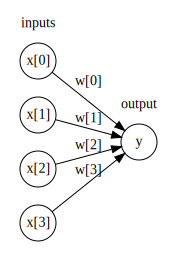

In [0]:
# Single-layer perceptron (similar to logistic regression)

# works for only linearly separable tasks

display(mglearn.plots.plot_logistic_regression_graph())

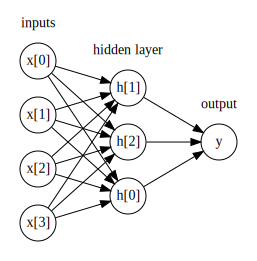

In [0]:
# Multi-layer perceptron

# Applicable to non-separable tasks  (universal approximator theorem)

display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'sigmoid(x), relu(x), tanh(x)')

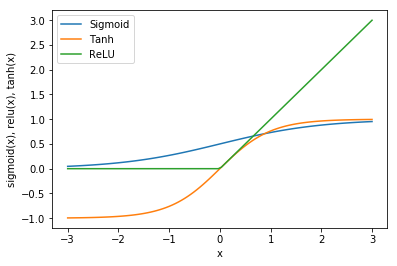

In [0]:
# non-linearity functions (sigmoid, tanh, ReLU)

line = np.linspace(-3, 3, 100)

plt.plot(line, [1/(1+np.exp(-x)) for x in line], label="Sigmoid")
plt.plot(line, np.tanh(line), label="Tanh")
plt.plot(line, np.maximum(line, 0), label="ReLU")

plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("sigmoid(x), relu(x), tanh(x)")

# Classification with MLP

In [0]:
# generate data

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

Text(0, 0.5, 'Feature 1')

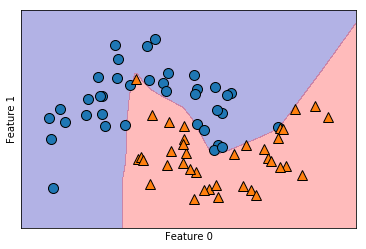

In [0]:
# using 100 hidden units  (default)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)   # LBFGS (memory limited BFGS): a quasi Newton optimizing algorithm

# visualize MLP
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

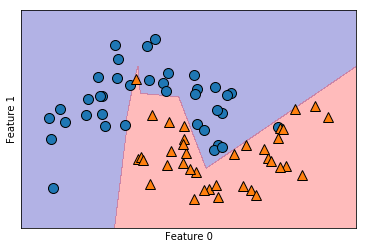

In [0]:
# using 10 hidden units

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

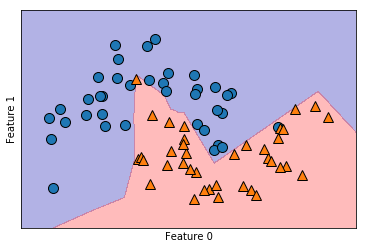

In [0]:
# using two hidden layers, with 10 units each

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [0]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

## Preprocessing data for MLP (standaridzation)

In [0]:
# load cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [0]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

In [0]:
# Normalizing data for MLP

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)


# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [0]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

# Regression with MLP

See https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


In [0]:
# load data
#X, y = mglearn.datasets.make_wave()

# generate data along sine wave


# generate data
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(loc=0, scale=0.3,size=len(X))
X = np.expand_dims(X, axis=-1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# plot data
plt.scatter(X_train, y_train, marker='o', label="training")
plt.scatter(X_test, y_test, marker='^', label="test")
plt.legend()

In [0]:
from sklearn.neural_network import MLPRegressor
mlpR = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (100, 100), max_iter=100000).fit(X_train, y_train)


# ridge regression for comparison
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)

print("Training set score: {:.2f}".format(mlpR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlpR.score(X_test, y_test)))

import matplotlib.pyplot as plt

# plot data
plt.scatter(X_train, y_train, marker='o', label="training")
plt.scatter(X_test, y_test, marker='^', label="test")

# plot prediction by MLP regressor
line = np.linspace(-3, 3, 100)
line = np.expand_dims(line, axis=-1)        # mlpR input should be an array of rank 2
line_MLP = mlpR.predict(line)
plt.scatter(line, line_MLP, marker='*', label="prediction by MLP")


# for comparison, plot prediction by Ridge regressor
line_ridge = ridge.predict(line)
plt.scatter(line, line_ridge, marker='.', label="prediction by ridge")

plt.legend()